Homework by Chenye Jin. Written in JupyterLab & $\LaTeX$.

# Lagrange function

给定一组数据点 $(x_0, y_0), (x_1, y_1), ..., (x_n, y_n)$，拉格朗日插值的目标是找到一个 $n$ 次多项式 $P(x)$，使得它经过所有这些数据点，即 $P(x_i) = y_i (i=0,1,...,n)$。

Given a set of data points $(x_0, y_0), (x_1, y_1), ..., (x_n, y_n)$, the goal of Lagrange interpolation is to find an $n$ th degree polynomial $P(x)$ such that it passes through all these data points, i.e., $P(x_i) = y_i (i=0,1,...,n)$.

这个$n$次多项式$P(x)$就被表示为$W(x)$，其解析表达式为：

This $n$ th degree polynomial $P(x)$ is represented as $W(x)$, whose analytical expression is:

$W(x) = Σ(i=0->n) y_i * L_i(x)$

其中$L_i(x)$是拉格朗日基底多项式，定义为：

Where $L_i(x)$ is the Lagrange basis polynomial, defined as:

$L_i(x) = Π(j=0->n,j!=i) (x - x_j) / (x_i - x_j)$

The following is my code implementation: （以下是我的代码实现：）

In [1]:
import numpy as np

def lagrange_interpolation(x, points):
    n = len(points) # n is the length of points tuples
    result = 0.0 # result will be the final W(x) result and we sum up on it

    # you can see W(x) is $Σ(i=0->n) y[i] * L[i](x)$ so the outside loop is calculating that summation
    # y_i_mul_L_i_x is the y[i] * L[i](x) inside the summation 

    for i in range(n):
        y_i_mul_L_i_x = points[i][1] # y_i_mul_L_i_xs initialize with y[i] first.
        for j in range(n): # and inside the loop is *L[i](x) part
            if i != j: # also the contraints in formula. 
                # you know anything/(points[i][0]-points[i==j][0]) makes divide 0. which is not allowed in both programming and math. 
                y_i_mul_L_i_x *= (x - points[j][0]) / (points[i][0] - points[j][0])
                # every time upline executed, y_i_mul_L_i_x just multiply L[j](x)
        # so when code comes here, y_i_mul_L_i_x just = y[i] * L[1](x) * L[2](x) * ... * L[n](x)
        result += y_i_mul_L_i_x
        # and then we sum up the y_i_mul_L_i_x onto the final result
    return result

# format: (x,y) tuples in points list
example_points = [(1, 3), (2, 5), (3, 7)]

# so we define langrange interpolation upper here

# and we define a function in order to combine xy arrays easily 
def combine_xy(x, y):
    if len(x) != len(y):
        raise ValueError("Input lists must have the same length.")

    points = []
    for i in range(len(x)):
        points.append((x[i], y[i]))

    return points

# Define $X_{a,b,c,d,e}$ and calculate $Y_{f1,f2}(x)$

In [2]:
import numpy as np
import pandas as pd

# homework functions
f1 = lambda x: np.abs(x)
f2 = lambda x: np.exp(np.abs(x))

# define interpolation nodes and function vals
X_a = [-5.0, 0.0, 5.0]
Yf1_a = [f1(x) for x in X_a]
Yf2_a = [f2(x) for x in X_a]

X_b = [-10.0, 0.0, 10.0]
Yf1_b = [f1(x) for x in X_b]
Yf2_b = [f2(x) for x in X_b]

X_c = [-5.0, -2.0, 0.0, 2.0, 5.0]
Yf1_c = [f1(x) for x in X_c]
Yf2_c = [f2(x) for x in X_c]

X_d = [-9.0, -5.0, 0.0, 5.0, 9.0]
Yf1_d = [f1(x) for x in X_d]
Yf2_d = [f2(x) for x in X_d]

X_e = [-10.0, -9.0, -5.0, -2.0, -1.0, 0.0, 1.0, 2.0, 5.0, 9.0, 10.0]
Yf1_e = [f1(x) for x in X_e]
Yf2_e = [f2(x) for x in X_e]

# create data frames
df_a = pd.DataFrame({"X": X_a, "f(x) = abs(x)": Yf1_a, "f(x) = exp(abs(x))": Yf2_a})
df_b = pd.DataFrame({"X": X_b, "f(x) = abs(x)": Yf1_b, "f(x) = exp(abs(x))": Yf2_b})
df_c = pd.DataFrame({"X": X_c, "f(x) = abs(x)": Yf1_c, "f(x) = exp(abs(x))": Yf2_c})
df_d = pd.DataFrame({"X": X_d, "f(x) = abs(x)": Yf1_d, "f(x) = exp(abs(x))": Yf2_d})
df_e = pd.DataFrame({"X": X_e, "f(x) = abs(x)": Yf1_e, "f(x) = exp(abs(x))": Yf2_e})

# display them all
print("Interpolation Nodes and Function Values:")
display(df_a)
display(df_b)
display(df_c)
display(df_d)
display(df_e)

Interpolation Nodes and Function Values:


,X,f(x) = abs(x),f(x) = exp(abs(x))
0,-5.0,5.0,148.413159
1,0.0,0.0,1.000000
2,5.0,5.0,148.413159


,X,f(x) = abs(x),f(x) = exp(abs(x))
0,-10.0,10.0,22026.465795
1,0.0,0.0,1.000000
2,10.0,10.0,22026.465795


,X,f(x) = abs(x),f(x) = exp(abs(x))
0,-5.0,5.0,148.413159
1,-2.0,2.0,7.389056
2,0.0,0.0,1.000000
3,2.0,2.0,7.389056
4,5.0,5.0,148.413159


,X,f(x) = abs(x),f(x) = exp(abs(x))
0,-9.0,9.0,8103.083928
1,-5.0,5.0,148.413159
2,0.0,0.0,1.000000
3,5.0,5.0,148.413159
4,9.0,9.0,8103.083928


,X,f(x) = abs(x),f(x) = exp(abs(x))
0,-10.0,10.0,22026.465795
1,-9.0,9.0,8103.083928
2,-5.0,5.0,148.413159
3,-2.0,2.0,7.389056
4,-1.0,1.0,2.718282
5,0.0,0.0,1.000000
6,1.0,1.0,2.718282
7,2.0,2.0,7.389056
8,5.0,5.0,148.413159
9,9.0,9.0,8103.083928


# Eval W(x) with x vals from np.arange(-10, 11)

In [3]:
eval_x_values = np.arange(-10, 11)
# define the x values as the homework told [-10, -9 ... 9, 10]
print(f"Xvalues:\n{eval_x_values}")

Xvalues:
[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


我使用每对 $(X_{a,b,c,d,e},Y_{f1,f2})$ 值得到了10个插值函数，并使用这些函数来计算 $X = [-10, -9, ..., 9, 10]$ 的 $W(X)$ 值。以下是我的代码实现：

I get interpolation functions with each $(X_{a,b,c,d,e},Y_{f1,f2})$ values.
and use those 10 functions to obtain the $X = [-10, -9 ... 9, 10]$'s $W(X)$ values.
My code implementation is here:

In [4]:
# now calculate W(x) the assignment requested

# Evaluation points
x = np.arange(-10, 11)

# Combine interpolation nodes and function values into tuples
points_f1_a = combine_xy(X_a, Yf1_a)
points_f2_a = combine_xy(X_a, Yf2_a)

points_f1_b = combine_xy(X_b, Yf1_b)
points_f2_b = combine_xy(X_b, Yf2_b)

points_f1_c = combine_xy(X_c, Yf1_c)
points_f2_c = combine_xy(X_c, Yf2_c)

points_f1_d = combine_xy(X_d, Yf1_d)
points_f2_d = combine_xy(X_d, Yf2_d)

points_f1_e = combine_xy(X_e, Yf1_e)
points_f2_e = combine_xy(X_e, Yf2_e)

# Compute the interpolation polynomials for each set of data
W_f1_a = [lagrange_interpolation(x_val, points_f1_a) for x_val in x]
W_f2_a = [lagrange_interpolation(x_val, points_f2_a) for x_val in x]

W_f1_b = [lagrange_interpolation(x_val, points_f1_b) for x_val in x]
W_f2_b = [lagrange_interpolation(x_val, points_f2_b) for x_val in x]

W_f1_c = [lagrange_interpolation(x_val, points_f1_c) for x_val in x]
W_f2_c = [lagrange_interpolation(x_val, points_f2_c) for x_val in x]

W_f1_d = [lagrange_interpolation(x_val, points_f1_d) for x_val in x]
W_f2_d = [lagrange_interpolation(x_val, points_f2_d) for x_val in x]

W_f1_e = [lagrange_interpolation(x_val, points_f1_e) for x_val in x]
W_f2_e = [lagrange_interpolation(x_val, points_f2_e) for x_val in x]

# as the teacher told, write the results' vector to a file make him easier to check
with open("chenyejin_result.txt", "w") as file:
    file.write("W_f1_Xa: " + str(W_f1_a) + "\n")
    file.write("W_f2_Xa: " + str(W_f2_a) + "\n")
    file.write("W_f1_Xb: " + str(W_f1_b) + "\n")
    file.write("W_f2_Xb: " + str(W_f2_b) + "\n")
    file.write("W_f1_Xc: " + str(W_f1_c) + "\n")
    file.write("W_f2_Xc: " + str(W_f2_c) + "\n")
    file.write("W_f1_Xd: " + str(W_f1_d) + "\n")
    file.write("W_f2_Xd: " + str(W_f2_d) + "\n")
    file.write("W_f1_Xe: " + str(W_f1_e) + "\n")
    file.write("W_f2_Xe: " + str(W_f2_e) + "\n")

# create a DataFrame to display the results
data1 = {
'x': x,
'W(x): f(x) = abs(x), X_a': W_f1_a,
'W(x): f(x) = abs(x), X_b': W_f1_b,
'W(x): f(x) = abs(x), X_c': W_f1_c,
'W(x): f(x) = abs(x), X_d': W_f1_d,
'W(x): f(x) = abs(x), X_e': W_f1_e
}
data2 = {
'x': x,
'W(x): f(x) = exp(abs(x)), X_a': W_f2_a,
'W(x): f(x) = exp(abs(x)), X_b': W_f2_b,
'W(x): f(x) = exp(abs(x)), X_c': W_f2_c,
'W(x): f(x) = exp(abs(x)), X_d': W_f2_d,
'W(x): f(x) = exp(abs(x)), X_e': W_f2_e
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
display(df1)
display(df2)

,x,"W(x): f(x) = abs(x), X_a","W(x): f(x) = abs(x), X_b","W(x): f(x) = abs(x), X_c","W(x): f(x) = abs(x), X_d","W(x): f(x) = abs(x), X_e"
0,-10,20.0,10.0,-87.142857,8.095238,10.000000
1,-9,16.2,8.1,-48.600000,9.000000,9.000000
2,-8,12.8,6.4,-22.857143,8.838095,75.964894
3,-7,9.8,4.9,-7.000000,7.933333,70.461435
4,-6,7.2,3.6,1.542857,6.571429,32.448120
5,-5,5.0,2.5,5.000000,5.000000,5.000000
6,-4,3.2,1.6,5.257143,3.428571,-2.421873
7,-3,1.8,0.9,3.857143,2.028571,0.048202
8,-2,0.8,0.4,2.000000,0.933333,2.000000
9,-1,0.2,0.1,0.542857,0.238095,1.000000


,x,"W(x): f(x) = exp(abs(x)), X_a","W(x): f(x) = exp(abs(x)), X_b","W(x): f(x) = exp(abs(x)), X_c","W(x): f(x) = exp(abs(x)), X_d","W(x): f(x) = exp(abs(x)), X_e"
0,-10,590.652636,22026.465795,2126.103472,13197.242074,22026.465795
1,-9,478.618635,17841.627294,1407.259301,8103.083928,8103.083928
2,-8,378.377687,14097.298109,889.375725,4573.850652,2934.593021
3,-7,289.929792,10793.478239,530.688483,2266.643016,1081.544334
4,-6,213.274949,7930.167686,294.346753,878.902871,406.136598
5,-5,148.413159,5507.366449,148.413159,148.413159,148.413159
6,-4,95.344422,3525.074527,65.863766,-146.702095,50.995349
7,-3,54.068737,1983.291922,24.588081,-187.977780,17.988978
8,-2,24.586105,882.018632,7.389056,-116.607696,7.389056
9,-1,6.896526,221.254658,1.983084,-33.444560,2.718282


# Another code with scipy's lagrange interpolation (just for eval)

In [5]:
# try with scipy one 
# results seems like same with mine algorithm 
import numpy as np
import pandas as pd
from scipy.interpolate import lagrange

x = np.arange(-10, 11)

points_f1_a = np.column_stack((X_a, Yf1_a))
points_f2_a = np.column_stack((X_a, Yf2_a))

points_f1_b = np.column_stack((X_b, Yf1_b))
points_f2_b = np.column_stack((X_b, Yf2_b))

points_f1_c = np.column_stack((X_c, Yf1_c))
points_f2_c = np.column_stack((X_c, Yf2_c))

points_f1_d = np.column_stack((X_d, Yf1_d))
points_f2_d = np.column_stack((X_d, Yf2_d))

points_f1_e = np.column_stack((X_e, Yf1_e))
points_f2_e = np.column_stack((X_e, Yf2_e))

W_f1_a = [lagrange(points_f1_a[:, 0], points_f1_a[:, 1])(xi) for xi in x]
W_f2_a = [lagrange(points_f2_a[:, 0], points_f2_a[:, 1])(xi) for xi in x]

W_f1_b = [lagrange(points_f1_b[:, 0], points_f1_b[:, 1])(xi) for xi in x]
W_f2_b = [lagrange(points_f2_b[:, 0], points_f2_b[:, 1])(xi) for xi in x]

W_f1_c = [lagrange(points_f1_c[:, 0], points_f1_c[:, 1])(xi) for xi in x]
W_f2_c = [lagrange(points_f2_c[:, 0], points_f2_c[:, 1])(xi) for xi in x]

W_f1_d = [lagrange(points_f1_d[:, 0], points_f1_d[:, 1])(xi) for xi in x]
W_f2_d = [lagrange(points_f2_d[:, 0], points_f2_d[:, 1])(xi) for xi in x]

W_f1_e = [lagrange(points_f1_e[:, 0], points_f1_e[:, 1])(xi) for xi in x]
W_f2_e = [lagrange(points_f2_e[:, 0], points_f2_e[:, 1])(xi) for xi in x]

data1 = {
    'x': x,
    'W(x): f(x) = abs(x), X_a': W_f1_a,
    'W(x): f(x) = abs(x), X_b': W_f1_b,
    'W(x): f(x) = abs(x), X_c': W_f1_c,
    'W(x): f(x) = abs(x), X_d': W_f1_d,
    'W(x): f(x) = abs(x), X_e': W_f1_e
}
data2 = {
    'x': x,
    'W(x): f(x) = exp(abs(x)), X_a': W_f2_a,
    'W(x): f(x) = exp(abs(x)), X_b': W_f2_b,
    'W(x): f(x) = exp(abs(x)), X_c': W_f2_c,
    'W(x): f(x) = exp(abs(x)), X_d': W_f2_d,
    'W(x): f(x) = exp(abs(x)), X_e': W_f2_e
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
display(df1)
display(df2)

,x,"W(x): f(x) = abs(x), X_a","W(x): f(x) = abs(x), X_b","W(x): f(x) = abs(x), X_c","W(x): f(x) = abs(x), X_d","W(x): f(x) = abs(x), X_e"
0,-10,20.0,10.0,-87.142857,8.095238,10.000000
1,-9,16.2,8.1,-48.600000,9.000000,9.000000
2,-8,12.8,6.4,-22.857143,8.838095,75.964894
3,-7,9.8,4.9,-7.000000,7.933333,70.461435
4,-6,7.2,3.6,1.542857,6.571429,32.448120
5,-5,5.0,2.5,5.000000,5.000000,5.000000
6,-4,3.2,1.6,5.257143,3.428571,-2.421873
7,-3,1.8,0.9,3.857143,2.028571,0.048202
8,-2,0.8,0.4,2.000000,0.933333,2.000000
9,-1,0.2,0.1,0.542857,0.238095,1.000000


,x,"W(x): f(x) = exp(abs(x)), X_a","W(x): f(x) = exp(abs(x)), X_b","W(x): f(x) = exp(abs(x)), X_c","W(x): f(x) = exp(abs(x)), X_d","W(x): f(x) = exp(abs(x)), X_e"
0,-10,590.652636,22026.465795,2126.103472,13197.242074,22026.465795
1,-9,478.618635,17841.627294,1407.259301,8103.083928,8103.083928
2,-8,378.377687,14097.298109,889.375725,4573.850652,2934.593021
3,-7,289.929792,10793.478239,530.688483,2266.643016,1081.544334
4,-6,213.274949,7930.167686,294.346753,878.902871,406.136598
5,-5,148.413159,5507.366449,148.413159,148.413159,148.413159
6,-4,95.344422,3525.074527,65.863766,-146.702095,50.995349
7,-3,54.068737,1983.291922,24.588081,-187.977780,17.988978
8,-2,24.586105,882.018632,7.389056,-116.607696,7.389056
9,-1,6.896526,221.254658,1.983084,-33.444560,2.718282


# Plot W(x) and f(x)

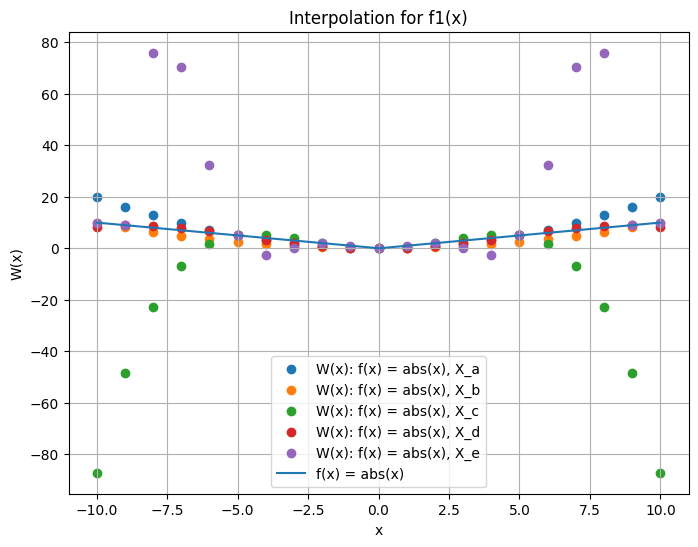

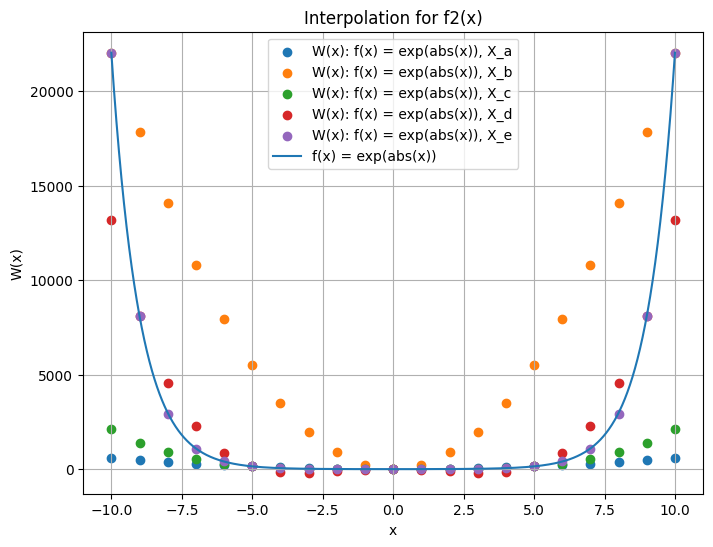

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.title('Interpolation for f1(x)')
plt.xlabel('x')
plt.ylabel('W(x)')

for key, value in data1.items():
    if key != 'x':
        label = "W(x): "+ key.split(': ')[1]  
        plt.scatter(data1['x'], value, label=label)

x_for_orignal = np.arange(-10,10.01,0.01)

plt.plot(x_for_orignal, [f1(x) for x in x_for_orignal], label = "f(x) = abs(x)")

plt.legend()  
plt.grid(True) 
plt.show()

plt.figure(figsize=(8, 6))
plt.title('Interpolation for f2(x)')
plt.xlabel('x')
plt.ylabel('W(x)')

for key, value in data2.items():
    if key != 'x':
        label = "W(x): "+ key.split(': ')[1]  
        plt.scatter(data2['x'], value, label=label)

plt.plot(x_for_orignal, [f2(x) for x in x_for_orignal], label = "f(x) = exp(abs(x))")

plt.legend() 
plt.grid(True)  
plt.show()

# Obtain relative and absolute error

In [7]:
import warnings
warnings.filterwarnings("ignore")

# batchly get the f1, f2 values with numpy 

f1_a = np.abs(x)
f2_a = np.exp(np.abs(x))

f1_b = np.abs(x)
f2_b = np.exp(np.abs(x))

f1_c = np.abs(x)
f2_c = np.exp(np.abs(x))

f1_d = np.abs(x)
f2_d = np.exp(np.abs(x))

f1_e = np.abs(x)
f2_e = np.exp(np.abs(x))

# calculate relative error and absolute errors

relative_error_f1_a = np.abs((f1_a - W_f1_a) / f1_a)
absolute_error_f1_a = np.abs(f1_a - W_f1_a)

relative_error_f2_a = np.abs((f2_a - W_f2_a) / f2_a)
absolute_error_f2_a = np.abs(f2_a - W_f2_a)

relative_error_f1_b = np.abs((f1_b - W_f1_b) / f1_b)
absolute_error_f1_b = np.abs(f1_b - W_f1_b)

relative_error_f2_b = np.abs((f2_b - W_f2_b) / f2_b)
absolute_error_f2_b = np.abs(f2_b - W_f2_b)

relative_error_f1_c = np.abs((f1_c - W_f1_c) / f1_c)
absolute_error_f1_c = np.abs(f1_c - W_f1_c)

relative_error_f2_c = np.abs((f2_c - W_f2_c) / f2_c)
absolute_error_f2_c = np.abs(f2_c - W_f2_c)

relative_error_f1_d = np.abs((f1_d - W_f1_d) / f1_d)
absolute_error_f1_d = np.abs(f1_d - W_f1_d)

relative_error_f2_d = np.abs((f2_d - W_f2_d) / f2_d)
absolute_error_f2_d = np.abs(f2_d - W_f2_d)

relative_error_f1_e = np.abs((f1_e - W_f1_e) / f1_e)
absolute_error_f1_e = np.abs(f1_e - W_f1_e)

relative_error_f2_e = np.abs((f2_e - W_f2_e) / f2_e)
absolute_error_f2_e = np.abs(f2_e - W_f2_e)

# Display errors

In [8]:
import pandas as pd

function_names = ['f1_Xa', 'f2_Xa', 'f1_Xb', 'f2_Xb', 'f1_Xc', 'f2_Xc', 'f1_Xd', 'f2_Xd', 'f1_Xe', 'f2_Xe']
relative_errors = [relative_error_f1_a, relative_error_f2_a, relative_error_f1_b, relative_error_f2_b,
                   relative_error_f1_c, relative_error_f2_c, relative_error_f1_d, relative_error_f2_d,
                   relative_error_f1_e, relative_error_f2_e]
relative_errors = [np.nanmean(error) for error in relative_errors]
absolute_errors = [absolute_error_f1_a, absolute_error_f2_a, absolute_error_f1_b, absolute_error_f2_b,
                   absolute_error_f1_c, absolute_error_f2_c, absolute_error_f1_d, absolute_error_f2_d,
                   absolute_error_f1_e, absolute_error_f2_e]
absolute_errors = [np.nanmean(error) for error in absolute_errors]

# mean errors calculated here 

data = {'Function': function_names, 'Mean Relative Error': relative_errors, 'Mean Absolute Error': absolute_errors}

# create a dataframe
df = pd.DataFrame(data)

# display the dataframe
display(df)

,Function,Mean Relative Error,Mean Absolute Error
0,f1_Xa,0.500000,2.857143
1,f2_Xa,0.980650,3119.601974
2,f1_Xb,0.450000,1.571429
3,f2_Xb,40.819824,4758.501854
4,f1_Xc,2.377143,19.678912
5,f2_Xc,0.373227,2798.028503
6,f1_Xd,0.228571,0.725624
7,f2_Xd,4.505829,1203.535569
8,f1_Xe,2.455895,15.928392
9,f2_Xe,0.019657,6.653424


Clearly, the best fit for the function $f1(x) = |x|$ is obtained by interpolating with Lagrange interpolation on the data set $X_d$.

The best fit for the function $f2(x) = \exp(|x|)$ is obtained by interpolating with Lagrange interpolation on the data set $X_e$.

结论：

显然， 由 $X_d$ 拉格朗日插值的 $f1(x) = abs(x)$ 的插值函数拟合得最好。

 由 $X_e$ 拉格朗日插值的 $f2(x) = exp(abs(x))$ 的插值函数拟合得最好。